# LIBRARY YANG DIGUNAKAN

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

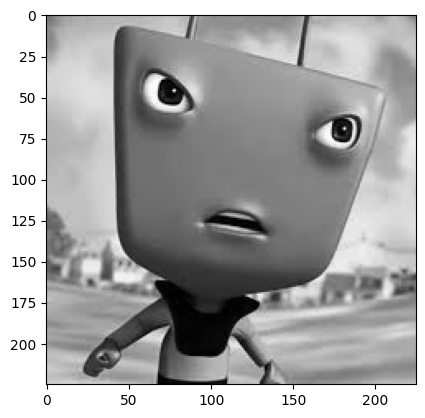

In [8]:
adudu = cv2.imread('Assets/Adudu.jpg')
adudu = cv2.cvtColor(adudu, cv2.COLOR_BGR2GRAY)


plt.imshow(adudu, cmap='gray')
plt.axis('on')
plt.show()

# FUNGSI PAD UNTUK MELAKUKAN KONVOLUSI

In [9]:
def pad_image(image, pad_size):
    h, w = image.shape
    padded = np.zeros((h + 2 * pad_size, w + 2 * pad_size), dtype=np.float32)
    padded[pad_size:h + pad_size, pad_size:w + pad_size] = image
    return padded

# FUNGSI MEAN

In [10]:
def mean_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded = pad_image(image, pad_size)
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            result[i, j] = np.mean(padded[i:i + kernel_size, j:j + kernel_size])
    
    return np.clip(result, 0, 255).astype(np.uint8)

# FUNGSI SHARPENING

In [11]:
def sharpening_filter(image):
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    padded = pad_image(image, 1)
    kernel = np.array([[1/9, 1/9, 1/9], [1/9, 8/9, 1/9], [1/9, 1/9, 1/9]])
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + 3, j:j + 3]
            result[i, j] = np.sum(window * kernel)
    
    return np.clip(result, 0, 255).astype(np.uint8)

# FUNGSI SMOOTHING

In [12]:
def smoothing_filter(image):
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    padded = pad_image(image, 1)
    kernel = np.array([[1/10, 1/10, 1/10], [1/10, 1/5, 1/10], [1/10, 1/10, 1/10]])
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + 3, j:j + 3]
            result[i, j] = np.sum(window * kernel)
    
    return np.clip(result, 0, 255).astype(np.uint8)

# FUNGSI MODULUS UNTUK MODULUS 3X3 DAN 9X9

In [13]:
def modulus_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded = pad_image(image, pad_size)
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.float32)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + kernel_size, j:j + kernel_size]
            result[i, j] = np.abs(window).mean() % 255
    
    return np.clip(result, 0, 255).astype(np.uint8)

# FUNGSI MEDIAN UNTUK MEDIAN 3X3 DAN 9X9

In [14]:
def median_filter(image, kernel_size):
    pad_size = kernel_size // 2
    padded = pad_image(image, pad_size)
    h, w = image.shape
    result = np.zeros_like(image, dtype=np.uint8)
    
    for i in range(h):
        for j in range(w):
            window = padded[i:i + kernel_size, j:j + kernel_size].flatten()
            result[i, j] = np.median(window)
    
    return result

# MENGGABUNGKAN SEMUA FILTER

In [15]:
mean_3x3 = mean_filter(adudu, 3)
mean_9x9 = mean_filter(adudu, 9)
sharpened = sharpening_filter(adudu)
smoothed = smoothing_filter(adudu)
modulus_3x3 = modulus_filter(adudu, 3)
modulus_9x9 = modulus_filter(adudu, 9)
median_3x3 = median_filter(adudu, 3)
median_9x9 = median_filter(adudu, 9)

# MENAMPILKAN GAMBAR YANG SUDAH DIMASUKKAN SEMUA FILTER

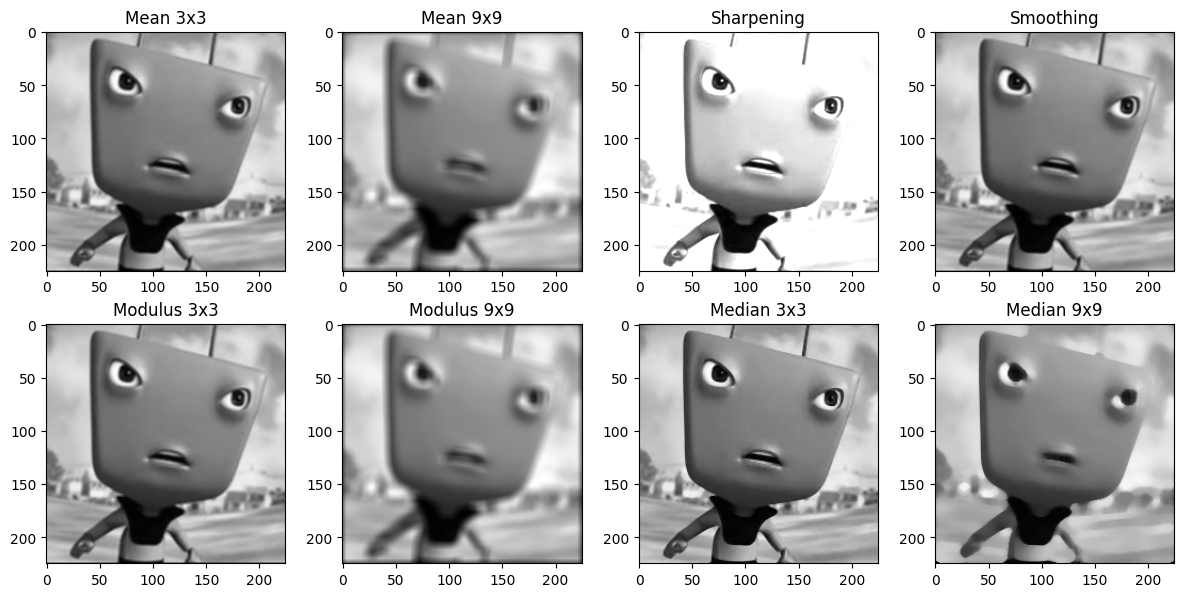

In [16]:

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes[0, 0].imshow(mean_3x3, cmap='gray')
axes[0, 0].set_title('Mean 3x3')
axes[0, 0].axis('on')

axes[0, 1].imshow(mean_9x9, cmap='gray')
axes[0, 1].set_title('Mean 9x9')
axes[0, 1].axis('on')

axes[0, 2].imshow(sharpened, cmap='gray')
axes[0, 2].set_title('Sharpening')
axes[0, 2].axis('on')

axes[0, 3].imshow(smoothed, cmap='gray')
axes[0, 3].set_title('Smoothing')
axes[0, 3].axis('on')

axes[1, 0].imshow(modulus_3x3, cmap='gray')
axes[1, 0].set_title('Modulus 3x3')
axes[1, 0].axis('on')

axes[1, 1].imshow(modulus_9x9, cmap='gray')
axes[1, 1].set_title('Modulus 9x9')
axes[1, 1].axis('on')

axes[1, 2].imshow(median_3x3, cmap='gray')
axes[1, 2].set_title('Median 3x3')
axes[1, 2].axis('on')

axes[1, 3].imshow(median_9x9, cmap='gray')
axes[1, 3].set_title('Median 9x9')
axes[1, 3].axis('on')

plt.tight_layout()
plt.show()